<a href="https://colab.research.google.com/github/King-AJr/bone-marrow-scrna/blob/main/bone_marrow_sc_rna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scanpy anndata igraph celltypist decoupler fa2-modified

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.8/620.8 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━

In [ ]:
import scanpy as sc
import anndata as ad
import pandas as pd

In [ ]:
!wget wget -O result.txt 'http://www.ensembl.org/biomart/martservice?query=<?xml version="1.0" encoding="UTF-8"?><!DOCTYPE Query><Query  virtualSchemaName = "default" formatter = "CSV" header = "0" uniqueRows = "0" count = "" datasetConfigVersion = "0.6" ><Dataset name = "hsapiens_gene_ensembl" interface = "default" ><Attribute name = "ensembl_gene_id" /><Attribute name = "external_gene_name" /></Dataset></Query>'

!wget https://github.com/josoga2/sc/raw/refs/heads/main/bone_marrow.h5ad


#this downloads the table of genes directly from ensemble

--2025-12-10 03:04:13--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2025-12-10 03:04:13--  http://www.ensembl.org/biomart/martservice?query=%3C?xml%20version=%221.0%22%20encoding=%22UTF-8%22?%3E%3C!DOCTYPE%20Query%3E%3CQuery%20%20virtualSchemaName%20=%20%22default%22%20formatter%20=%20%22CSV%22%20header%20=%20%220%22%20uniqueRows%20=%20%220%22%20count%20=%20%22%22%20datasetConfigVersion%20=%20%220.6%22%20%3E%3CDataset%20name%20=%20%22hsapiens_gene_ensembl%22%20interface%20=%20%22default%22%20%3E%3CAttribute%20name%20=%20%22ensembl_gene_id%22%20/%3E%3CAttribute%20name%20=%20%22external_gene_name%22%20/%3E%3C/Dataset%3E%3C/Query%3E
Resolving www.ensembl.org (www.ensembl.org)... 193.62.193.83
Connecting to www.ensembl.org (www.ensembl.org)|193.62.193.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘result.txt’

result.txt              [      <=>      

#🧩 Loading Data
In this step, we load the single-cell expression matrix into an AnnData object — the core data structure in Scanpy. It contains:

- adata.X: the expression matrix (cells × genes)
- adata.obs: metadata for each cell
- adata.var: metadata for each gene

In [ ]:
import decoupler as dc

In [ ]:
bone_marrow_adata = sc.read_h5ad("bone_marrow.h5ad")
bone_marrow_adata

AnnData object with n_obs × n_vars = 14783 × 17374
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'doi', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

In [ ]:
# let's look at the first 5 rows describing the cells in our dataset
bone_marrow_adata.obs.head()

,disease stage,treatment,timepoint,Dataset,sample,disease_original,disease_general,COVID-19 Condition,Lineage,Cell.group,...,is_primary_data,suspension_type,tissue_type,assay,disease,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep2,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Myeloid,CD14+ Monocyte,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,2P)e%zgsv_
Guo-AAACCTGAGAGGTTGC-7,remission,400 mg Tocilizumab at day 1,day 7,Guo et al._Nature Communication,Guo_P2-day7,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD8+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,78-year-old stage,Lv&N1yD6*0
Guo-AAACCTGAGATACACA-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,DZ>`^5OH2o
Guo-AAACCTGAGCGATTCT-1,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep1,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Lymphoid_T/NK,CD8+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,J4$QmqEgvX
Guo-AAACCTGAGTGAAGAG-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,Y&7u#&E`-T


In [ ]:
#let's see the first 5 rows describing genes in our dataset
bone_marrow_adata.var.head()

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ENSG00000161920,927,False,MED11,NCBITaxon:9606,gene,754,protein_coding
ENSG00000122335,429,False,SERAC1,NCBITaxon:9606,gene,2683,protein_coding
ENSG00000175548,149,False,ALG10B,NCBITaxon:9606,gene,1773,protein_coding
ENSG00000100330,426,False,MTMR3,NCBITaxon:9606,gene,634,protein_coding
ENSG00000176340,7171,False,COX8A,NCBITaxon:9606,gene,494,protein_coding


In [ ]:
# the dimensions of our dataset
bone_marrow_adata.shape

(14783, 17374)

In [ ]:
#view both genes and cells in a dataframe
bone_marrow_adata.to_df()

,ENSG00000161920,ENSG00000122335,ENSG00000175548,ENSG00000100330,ENSG00000176340,ENSG00000179846,ENSG00000204860,ENSG00000172260,ENSG00000141424,ENSG00000164512,...,ENSG00000164114,ENSG00000151702,ENSG00000224578,ENSG00000138756,ENSG00000111052,ENSG00000176946,ENSG00000150456,ENSG00000284934,ENSG00000261842,ENSG00000260456
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,0.0,0.000000,0.0,0.0,9.436466,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGAGGTTGC-7,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,8.817776,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGATACACA-3,0.0,8.651494,0.0,0.0,8.651494,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGCGATTCT-1,0.0,0.000000,0.0,0.0,8.858533,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGTGAAGAG-3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guo-TTTGTCAGTTTCGCTC-4,0.0,0.000000,0.0,0.0,8.389465,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-TTTGTCATCAGAGACG-7,0.0,0.000000,0.0,0.0,9.931639,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-TTTGTCATCAGATAAG-4,0.0,0.000000,0.0,0.0,10.009642,0.0,0.0,0.0,0.000000,0.0,...,0.0,9.01104,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#🧹 Quality Control (QC)

QC ensures we only keep high-quality cells and informative genes. Typical filters remove:

- Harmonize unique gene names
- Cells with too few genes (likely dead)
- Cells with too many genes (possible doublets)
- Genes expressed in very few cells (uninformative)

In [ ]:
#fix duplicate names in our AnnData object so that every gene and every cell has a unique identifier
bone_marrow_adata.var_names_make_unique()
bone_marrow_adata.obs_names_make_unique()
bone_marrow_adata

AnnData object with n_obs × n_vars = 14783 × 17374
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'doi', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

In [ ]:
#Let's search for possible contamination from dying cells, ribosomal transcripts or hemoglobin

#Cells with a high proportion of mitochondrial reads (say >10–20%) are likely stressed, apoptotic, or poorly captured
#Ribosomal transcripts are removed because they represent global transcriptional activity, not cell-type-specific biology
#Instead of true cell populations, high HB signal often represents ambient RNA contamination from lysed red blood cells

#Mitochondrial genes
bone_marrow_adata.var['MT'] = bone_marrow_adata.var_names.str.startswith("MT-")

#Ribosomal: RPS* and RPL*
bone_marrow_adata.var['RIBO'] = bone_marrow_adata.var_names.str.startswith(("RPS", "RPL"))

 #Hemoglobin: selected known genes
bone_marrow_adata.var['HB'] = bone_marrow_adata.var_names.str.startswith("^HB[^(P)]")

bone_marrow_adata.var[['MT', 'RIBO', 'HB']].sum()

,0
MT,0
RIBO,0
HB,0


This means that:

- No gene name starts with “MT-”
- No gene name starts with “RPS” or “RPL”
- No gene name starts with “HB”

In [ ]:
#calculate the qc metrics
sc.pp.calculate_qc_metrics(
    bone_marrow_adata, qc_vars=["MT", 'RIBO', 'HB'], inplace=True, log1p=True
)

In [ ]:
bone_marrow_adata.obs.head()

,disease stage,treatment,timepoint,Dataset,sample,disease_original,disease_general,COVID-19 Condition,Lineage,Cell.group,...,pct_counts_in_top_500_genes,total_counts_MT,log1p_total_counts_MT,pct_counts_MT,total_counts_RIBO,log1p_total_counts_RIBO,pct_counts_RIBO,total_counts_HB,log1p_total_counts_HB,pct_counts_HB
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep2,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Myeloid,CD14+ Monocyte,...,40.537370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGAGGTTGC-7,remission,400 mg Tocilizumab at day 1,day 7,Guo et al._Nature Communication,Guo_P2-day7,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD8+ T cell,...,57.850376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGATACACA-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,59.749640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGCGATTCT-1,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep1,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Lymphoid_T/NK,CD8+ T cell,...,56.156243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGTGAAGAG-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,100.000121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Since no genes were flagged as MT, RIBO, or HB, Scanpy has nothing to count

In [ ]:
bone_marrow_adata.var.head()

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,MT,RIBO,HB,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
ENSG00000161920,927,False,MED11,NCBITaxon:9606,gene,754,protein_coding,False,False,False,885,0.502831,0.407351,94.013394,7433.353516,8.913867
ENSG00000122335,429,False,SERAC1,NCBITaxon:9606,gene,2683,protein_coding,False,False,False,405,0.231814,0.208488,97.260367,3426.911377,8.139707
ENSG00000175548,149,False,ALG10B,NCBITaxon:9606,gene,1773,protein_coding,False,False,False,142,0.082084,0.078889,99.039437,1213.443970,7.102042
ENSG00000100330,426,False,MTMR3,NCBITaxon:9606,gene,634,protein_coding,False,False,False,404,0.227307,0.204822,97.267131,3360.278564,8.120077
ENSG00000176340,7171,False,COX8A,NCBITaxon:9606,gene,494,protein_coding,False,False,False,6898,4.277597,1.663471,53.338294,63235.750000,11.054641


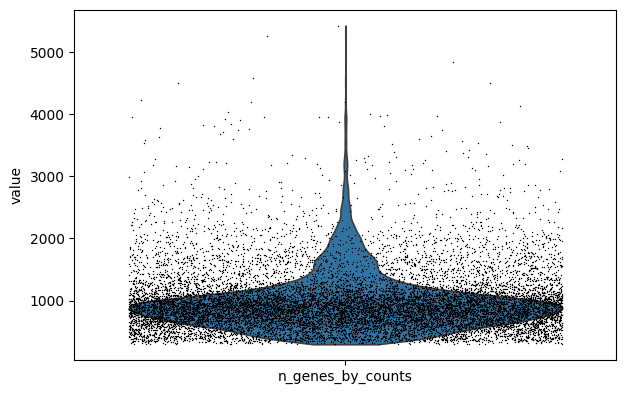

In [ ]:
#what is the average number of genes that have at least one detected identifier in each cell.
#in other words, the number of genes expressed in each cell

sc.pl.violin(
    bone_marrow_adata,
    ["n_genes_by_counts"],
    jitter=0.4,
    multi_panel=False,
)

The violin plot shows that most cells express between 1,000–2,000 genes, with a tail of cells expressing up to 5,000, suggesting a mix of normal cells plus a few high-complexity or potentially doublet cells.

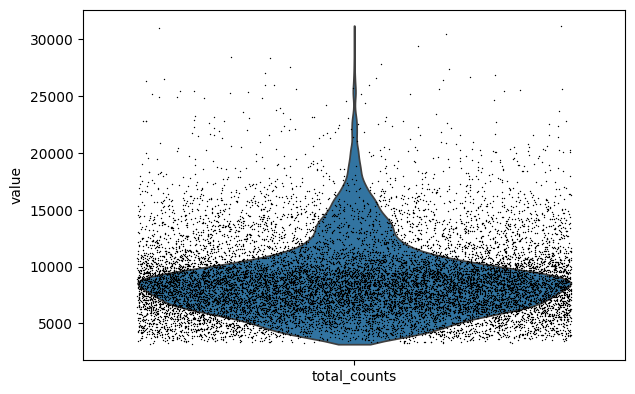

In [ ]:
#What is the total number of molecules (UMI) detected in a cell.
#basically you can have 10 UMI molecules but they are all pointing to the same gene.

sc.pl.violin(
   bone_marrow_adata,
    ["total_counts"],
    jitter=0.4,
    multi_panel=False,
)

Many cells have between 5,000–15,000 UMIs. Some cells are low-UMI (likely dead or damaged cells). A tail extends up to 30,000+ UMIs — these might be doublets (two cells captured together), highly transcriptionally active cells or technical variation

In [ ]:
sc.pp.scrublet(bone_marrow_adata)

# ⚖️ Normalization
Normalization adjusts for sequencing depth differences between cells. Here, we scale counts so each cell has the same total expression level.

In [ ]:
# Save a copy of the data
bone_marrow_adata.layers["counts"] = bone_marrow_adata.X.copy()

In [ ]:
# Normalizing to median total counts
sc.pp.normalize_total(bone_marrow_adata)
# Logarithmize the data
sc.pp.log1p(bone_marrow_adata)


In [ ]:
#Feature selection
#selecting the top 1000 most variable genes
sc.pp.highly_variable_genes(bone_marrow_adata, n_top_genes=1000)

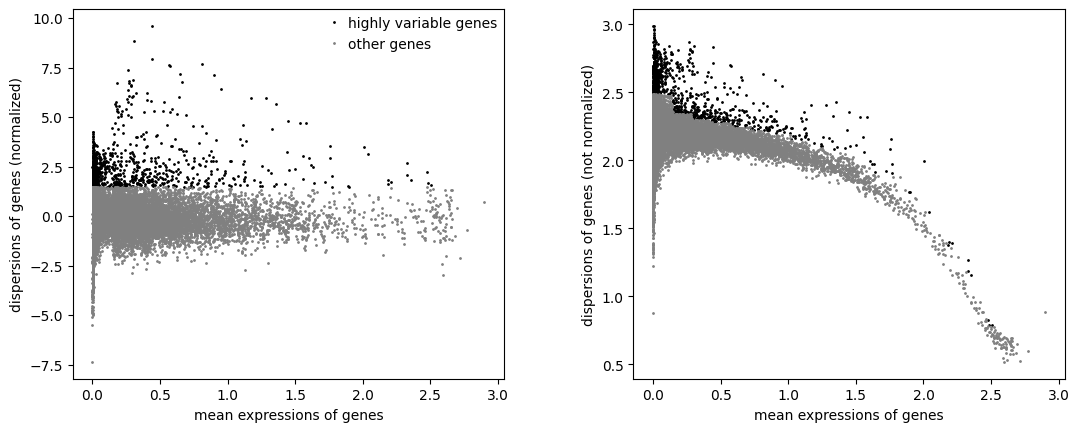

In [ ]:
sc.pl.highly_variable_genes(bone_marrow_adata)
#left is normalized
#right is not

#🔍 Dimensionality Reduction (PCA)
We use Principal Component Analysis (PCA) to reduce data complexity and highlight key variation patterns. This makes later steps like clustering and visualization faster and more robust.

In single-cell RNA-seq, each cell has expression values for thousands of genes, creating a huge, noisy matrix. PCA compresses this high-dimensional data into a smaller set of features (typically 30–50 components) that summarize the key biological and technical variation across cells.

Noise reduction: scRNA-seq data are sparse and noisy. PCA focuses on the strongest correlated gene expression patterns, discarding random noise.

Computational efficiency: Downstream analyses like clustering, UMAP, or t-SNE run much faster and more robustly on 30 PCs than on 20,000 genes.

Signal extraction: The top PCs often correspond to meaningful biological structure—cell type, cell cycle state, or activation level—while later PCs capture less relevant variation.

In [ ]:
sc.tl.pca(bone_marrow_adata)

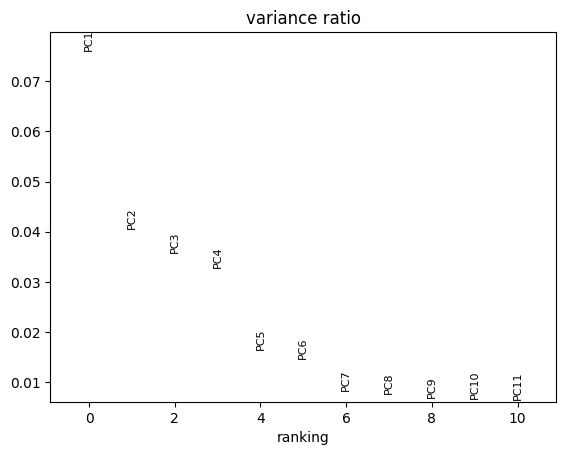

In [ ]:
sc.pl.pca_variance_ratio(bone_marrow_adata, n_pcs=10, log=False)

This plot shows how much variation each principal component explains, and it helps us decide how many PCs contain real biological signal vs how many are just noise. Ideally, statistically, we would use 6–10 PCs.
But because biological variation is subtle and spread out, using only those PCs collapses important cell types.

In [ ]:
## Nearest Neighbour
# Let us compute the neighborhood graph of cells using the PCA representation of the data matrix.
# basically we want to cluster the PCA components

In [ ]:
sc.pp.neighbors(bone_marrow_adata)

Clustering by communities.
Clustering by communities in single-cell RNA-seq is the process of grouping cells that show similar expression profiles — essentially, discovering putative cell types or states.

Once PCA compresses your data into a manageable set of dimensions, clustering algorithms like Leiden operate on a graph-based representation of cell–cell relationships.

which we can then use cell type detection

In [ ]:
sc.tl.umap(bone_marrow_adata)

UMAP takes the neighbor graph and projects cells into 2D while preserving:

- cell–cell neighborhoods

- local structure

- biological transitions/gradients

UMAP is only visualization — the true structure is in the kNN graph.

In [ ]:
# Using the igraph implementation and a fixed number of iterations can be significantly faster, especially for larger datasets
sc.tl.leiden(bone_marrow_adata, flavor="igraph", n_iterations=2)

Leiden is a community-detection algorithm used to identify groups of similar cells within single-cell RNA-seq data.

Instead of relying on raw gene expression, it operates on the k-nearest-neighbor graph built from PCA, where each cell is connected to the cells most similar to it. Using this graph as input, the Leiden algorithm partitions the cells into distinct clusters, each representing a “community” of cells that share similar expression patterns.

These clusters typically correspond to putative cell types or cell states, forming the foundation for downstream biological interpretation.

In [ ]:
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden"],
    size=8,
)

In [ ]:
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
    ncols = 1
)

In [ ]:
sc.pl.umap(
    bone_marrow_adata,
    color=[ "predicted_doublet"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
    ncols = 1
)


In [ ]:
sc.pl.umap(
    bone_marrow_adata,
    color=[ "doublet_score"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
    ncols = 1
)

In [ ]:
#Further reclustering

In [ ]:
sc.tl.leiden(bone_marrow_adata, flavor="igraph", n_iterations=2, key_added="leiden_res0_02", resolution=0.02)
sc.tl.leiden(bone_marrow_adata, flavor="igraph", n_iterations=2, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(bone_marrow_adata, flavor="igraph", n_iterations=2, key_added="leiden_res1", resolution=1)
sc.tl.leiden(bone_marrow_adata, flavor="igraph", n_iterations=2, key_added="leiden_res2", resolution=2)

allows us to explore the data at different granularities

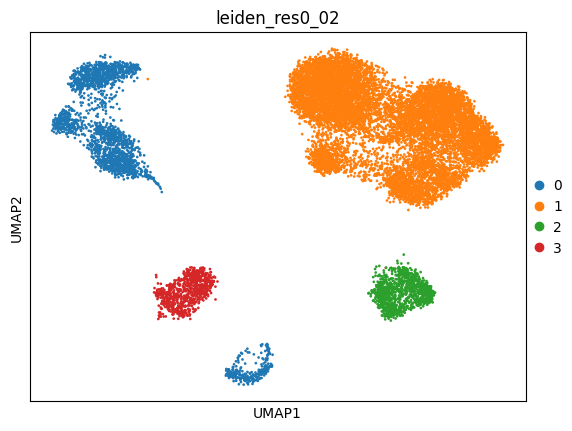

In [ ]:
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden_res0_02"],
    # increase horizontal space between panels
    wspace=0.5,
    size=15,
    ncols = 1
)

In [ ]:
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden_res0_5"],
    # increase horizontal space between panels
    wspace=0.5,
    size=15,
    ncols = 1,
    legend_loc="on data"
)

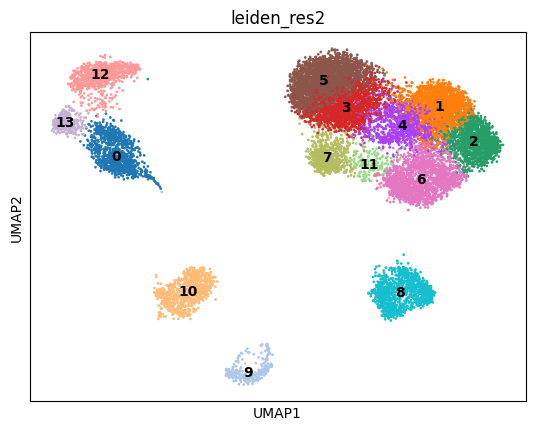

In [ ]:
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden_res2"],
    # increase horizontal space between panels
    wspace=0.5,
    size=15,
    ncols = 1,
    legend_loc="on data"
)

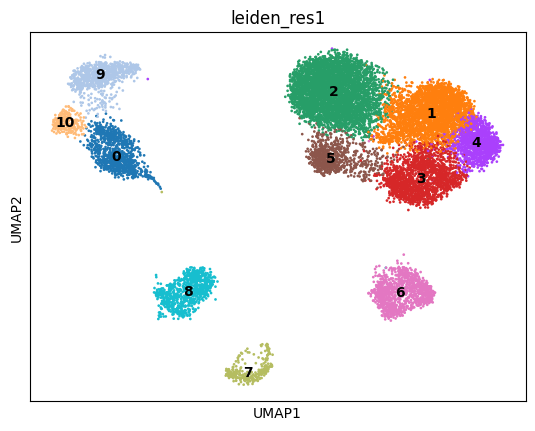

In [ ]:
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden_res1"],
    # increase horizontal space between panels
    wspace=0.5,
    size=15,
    ncols = 1,
    legend_loc="on data"
)

#Cell Annotation
Cell annotation is the process of assigning biological meaning—like cell type or functional state—to each cluster found after Leiden clustering.

Traditionally, this relies on manual marker gene inspection: you identify top genes per cluster and match them to known markers. But tools like Decoupler enable a more systematic and data-driven approach.

Decoupler is a framework for gene set activity inference. Instead of labeling clusters by single markers, it estimates the activity of predefined pathways, transcription factors, or cell-type signatures from known databases (e.g., MSigDB, PROGENy, DoRothEA).

In practice:

You provide your normalized expression matrix (adata).

You load gene sets representing known biological programs or cell-type signatures.

Decoupler calculates an activity score per cell or cluster using methods like weighted mean, ULM, or AUCell.

You interpret those activities to annotate clusters automatically or semi-automatically.

In [ ]:
# Query Omnipath and get CellMarker
markers = dc.op.resource(name="PanglaoDB", organism="human")

# Keep canonical cell type markers alone
markers = markers[markers["canonical_marker"]]

# Remove duplicated entries
markers = markers[~markers.duplicated(["cell_type", "genesymbol"])]

# Format because dc only accepts cell_type and genesymbol
markers = markers.rename(columns={"cell_type": "source", "genesymbol": "target"})
markers = markers[["source", "target"]]

# Convert 'feature_name' column to a plain Index of strings before assigning to var_names
bone_marrow_adata.var_names = pd.Index(bone_marrow_adata.var['feature_name'].astype(str))
bone_marrow_adata.var_names_make_unique()


In [ ]:
markers.tail()

,source,target
,,
8201,B cells naive,ZNF286A
8202,Pluripotent stem cells,ZNF296
8203,Adipocytes,ZNF423
8205,Gamma (PP) cells,ZNF503
8208,Germ cells,ZPBP2


In [ ]:
print(type(markers))
markers.head()
markers.columns


<class 'pandas.core.frame.DataFrame'>


Index(['source', 'target'], dtype='object', name='')

In [ ]:
bone_marrow_adata.var.head()
bone_marrow_adata.var.index[:10]

Index(['MED11', 'SERAC1', 'ALG10B', 'MTMR3', 'COX8A', 'NKPD1', 'FAM201A',
       'NEGR1', 'SLC39A6', 'ANKRD55'],
      dtype='object', name='feature_name')

In [ ]:
bone_marrow_adata.var.columns


Index(['n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference',
       'feature_biotype', 'feature_length', 'feature_type', 'MT', 'RIBO', 'HB',
       'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts',
       'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts',
       'highly_variable', 'means', 'dispersions', 'dispersions_norm'],
      dtype='object')

In [ ]:
bone_marrow_adata.var.head()

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,MT,RIBO,HB,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,highly_variable,means,dispersions,dispersions_norm
feature_name,,,,,,,,,,,,,,,,,,,,
MED11,927,False,MED11,NCBITaxon:9606,gene,754,protein_coding,False,False,False,885,0.502831,0.407351,94.013394,7433.353516,8.913867,False,0.382747,2.204887,0.182288
SERAC1,429,False,SERAC1,NCBITaxon:9606,gene,2683,protein_coding,False,False,False,405,0.231814,0.208488,97.260367,3426.911377,8.139707,False,0.205677,2.292054,0.912055
ALG10B,149,False,ALG10B,NCBITaxon:9606,gene,1773,protein_coding,False,False,False,142,0.082084,0.078889,99.039437,1213.443970,7.102042,False,0.078940,2.367475,0.832775
MTMR3,426,False,MTMR3,NCBITaxon:9606,gene,634,protein_coding,False,False,False,404,0.227307,0.204822,97.267131,3360.278564,8.120077,False,0.176498,2.109493,-1.132088
COX8A,7171,False,COX8A,NCBITaxon:9606,gene,494,protein_coding,False,False,False,6898,4.277597,1.663471,53.338294,63235.750000,11.054641,False,1.596090,1.774121,-0.382456


In [ ]:
dc.mt.ulm(data=bone_marrow_adata,
          net=markers,
          tmin = 3)

In [55]:
#retrieve the score for each cell type

score = dc.pp.get_obsm(bone_marrow_adata, key="score_ulm")
score

AnnData object with n_obs × n_vars = 14783 × 126
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_RIBO', 'log1p_total_counts_RIBO', '

In [54]:
#preview the data
bone_marrow_adata.obsm["score_ulm"].head()

,Acinar cells,Adipocytes,Adrenergic neurons,Airway goblet cells,Alpha cells,Alveolar macrophages,Astrocytes,B cells,B cells memory,B cells naive,...,T follicular helper cells,T helper cells,T memory cells,T regulatory cells,Tanycytes,Taste receptor cells,Thymocytes,Trophoblast cells,Tuft cells,Urothelial cells
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,0.883366,0.016440,-0.592726,-0.662709,0.835840,0.855729,0.297566,1.485696,-0.306571,0.237990,...,-0.513300,-0.422886,1.642851,-0.004406,0.544296,0.413771,-0.543441,-0.513300,3.113940,-0.784177
Guo-AAACCTGAGAGGTTGC-7,-0.906417,-1.284214,-0.467915,-0.523161,1.583154,1.219329,0.157764,0.487843,-0.624417,1.770228,...,-0.405214,3.168090,-0.405214,0.462934,0.897830,0.897830,3.848090,-0.405214,-0.202421,-0.619050
Guo-AAACCTGAGATACACA-3,-0.892457,-0.682421,-0.460709,-0.515104,1.573294,1.187902,1.656056,3.930777,1.925992,2.500056,...,-0.398974,1.170355,2.442601,-0.798165,0.925009,-0.651620,1.906375,2.286422,0.851602,-0.609516
Guo-AAACCTGAGCGATTCT-1,-0.922276,-0.772815,-0.476102,-0.532314,0.269852,1.180849,0.774435,4.512301,1.123891,1.731658,...,-0.412304,0.081099,2.300032,-0.824834,-0.673392,-0.673392,0.929784,-0.412304,1.709482,-0.629881
Guo-AAACCTGAGTGAAGAG-3,-0.643675,-0.510286,-0.332284,-0.371516,-0.621831,1.977723,0.019345,1.642936,2.016226,2.030037,...,-0.287758,2.170472,3.344478,1.184859,-0.469977,-0.469977,-0.761742,-0.287758,1.787138,-0.439610


In [52]:
score_df = pd.DataFrame(
    bone_marrow_adata.obsm["score_ulm"],
    index=bone_marrow_adata.obs_names,      # cells
    columns=bone_marrow_adata.obsm["score_ulm"].columns  # cell types
)

score_df.head()

,Acinar cells,Adipocytes,Adrenergic neurons,Airway goblet cells,Alpha cells,Alveolar macrophages,Astrocytes,B cells,B cells memory,B cells naive,...,T follicular helper cells,T helper cells,T memory cells,T regulatory cells,Tanycytes,Taste receptor cells,Thymocytes,Trophoblast cells,Tuft cells,Urothelial cells
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,0.883366,0.016440,-0.592726,-0.662709,0.835840,0.855729,0.297566,1.485696,-0.306571,0.237990,...,-0.513300,-0.422886,1.642851,-0.004406,0.544296,0.413771,-0.543441,-0.513300,3.113940,-0.784177
Guo-AAACCTGAGAGGTTGC-7,-0.906417,-1.284214,-0.467915,-0.523161,1.583154,1.219329,0.157764,0.487843,-0.624417,1.770228,...,-0.405214,3.168090,-0.405214,0.462934,0.897830,0.897830,3.848090,-0.405214,-0.202421,-0.619050
Guo-AAACCTGAGATACACA-3,-0.892457,-0.682421,-0.460709,-0.515104,1.573294,1.187902,1.656056,3.930777,1.925992,2.500056,...,-0.398974,1.170355,2.442601,-0.798165,0.925009,-0.651620,1.906375,2.286422,0.851602,-0.609516
Guo-AAACCTGAGCGATTCT-1,-0.922276,-0.772815,-0.476102,-0.532314,0.269852,1.180849,0.774435,4.512301,1.123891,1.731658,...,-0.412304,0.081099,2.300032,-0.824834,-0.673392,-0.673392,0.929784,-0.412304,1.709482,-0.629881
Guo-AAACCTGAGTGAAGAG-3,-0.643675,-0.510286,-0.332284,-0.371516,-0.621831,1.977723,0.019345,1.642936,2.016226,2.030037,...,-0.287758,2.170472,3.344478,1.184859,-0.469977,-0.469977,-0.761742,-0.287758,1.787138,-0.439610


In [ ]:
# Mean score per cell type across all cells
top_celltypes = score_df.mean(axis=0).sort_values(ascending=False).head(5)
print(top_celltypes)


In [ ]:
top5 = top_celltypes.index.tolist()

# Replace spaces with underscores for obs keys
for ct in top5:
    bone_marrow_adata.obs[ct.replace(" ", "_")] = score_df[ct]

# Plot each top cell type + leiden side-by-side
for ct in top5:
    ct_key = ct.replace(" ", "_")
    sc.pl.umap(
        bone_marrow_adata,
        color=[ct_key, "leiden_res1"],
        cmap="RdBu_r",        # diverging color map for activity
        wspace=0.5,           # space between plots
        size=20,              # point size
        show=True
    )


In [53]:
# Get cell-type scores as DataFrame
score = dc.pp.get_obsm(bone_marrow_adata, key="score_ulm")

#Rank signatures per cluster for your main clustering
rank_df = dc.tl.rankby_group(
    score,
    groupby="leiden_res1",  # use the same clustering
    reference="rest",
    method="t-test_overestim_var",
)

# Keep only positive stats (enriched vs rest)
rank_df = rank_df[rank_df["stat"] > 0]

#Take top signature per cluster
cluster_auto = (
    rank_df
    .sort_values(["group", "stat"], ascending=[True, False])
    .groupby("group")
    .head(1)
    .set_index("group")["name"]
    .to_dict()
)

cluster_auto




/tmp/ipython-input-943613243.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("group")


{'0': 'Neutrophils',
 '1': 'Gamma delta T cells',
 '10': 'Neutrophils',
 '2': 'Nuocytes',
 '3': 'NK cells',
 '4': 'Gamma delta T cells',
 '5': 'Nuocytes',
 '6': 'B cells naive',
 '7': 'Platelets',
 '8': 'Plasma cells',
 '9': 'Monocytes'}

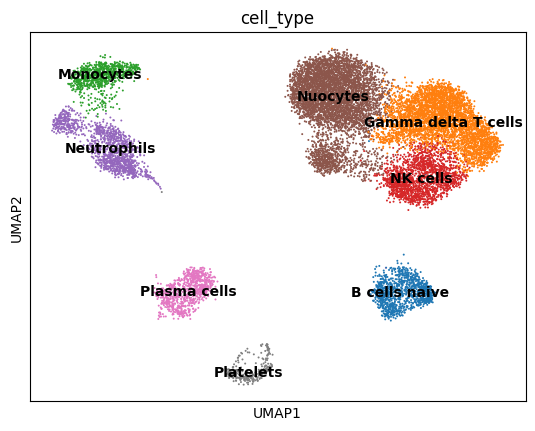

In [ ]:
bone_marrow_adata.obs["cell_type"] = (
    bone_marrow_adata.obs["leiden_res1"].map(cluster_auto)
).astype("category")

sc.pl.umap(bone_marrow_adata, color=["cell_type"], legend_loc="on data")